## Business Case - Linear Regression
 * Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective

**Problem Statment:**<br>
**Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.**

Column Profiling:

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose (SOP) Strength (out of 5)
* Letter of Recommendation (LOR) Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

In [2]:
df= pd.read_csv("Jamboree_Admission.csv")

In [3]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 500
Number of columns: 9


In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#checking null values
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().sum()

0

### unique values in each column

In [9]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### Analysis till now: 
1. In dataset there are **500** rows and **9** columns
2. No duplicate values 
3. No null values
4. In all columns there not much difference between mean and median values so we can say there may be no outliers.
5. 50% of the students have GRE score less than or equal to 317 and has range from 290 to 340.
6. 50% of the students have TOEFL score less than or equal to 107 and has range from 92 to 120.
7. Maximum student have research experiance
8. 75% of student have less than equal to 82% of chance of getting selected
9. **University Rating** and **Research** have less unique values and **SOP, LOR** have ordinal so we can consider them as **categorical column**
10. CGPA range is between 6.8 to 9.92.

In [10]:
column= list(df.columns)
column

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [11]:
# renaming "LOR " and "Chance of Admit "
df.rename({"LOR ": "LOR",
           "Chance of Admit ": "chance_of_admit"},axis=1, inplace= True)

In [12]:
clm = list(df.columns)
clm

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'chance_of_admit']

### Distribution of all columns

In [13]:
num_col= ['GRE Score','TOEFL Score','CGPA','chance_of_admit']

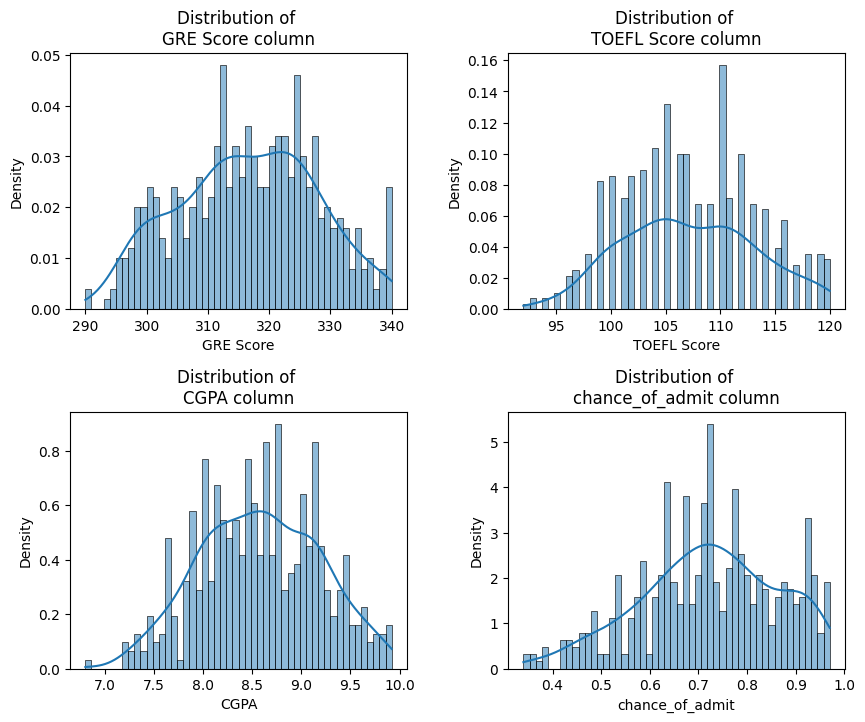

In [14]:
plt.figure(figsize= (10,8))
plt.subplots_adjust(wspace= 0.3)
plt.subplots_adjust(hspace= 0.4)
for i in range(len(num_col)):
    plt.subplot(2,2,i+1)
    sns.histplot(df[num_col[i]], bins=50, kde= True, stat= "density")
    plt.title(f"Distribution of \n{num_col[i]} column")

* **Column GRE, TOFEL score and CGPA showing normal distribution.**
* **Chance of admit showing bit of left skewed.**

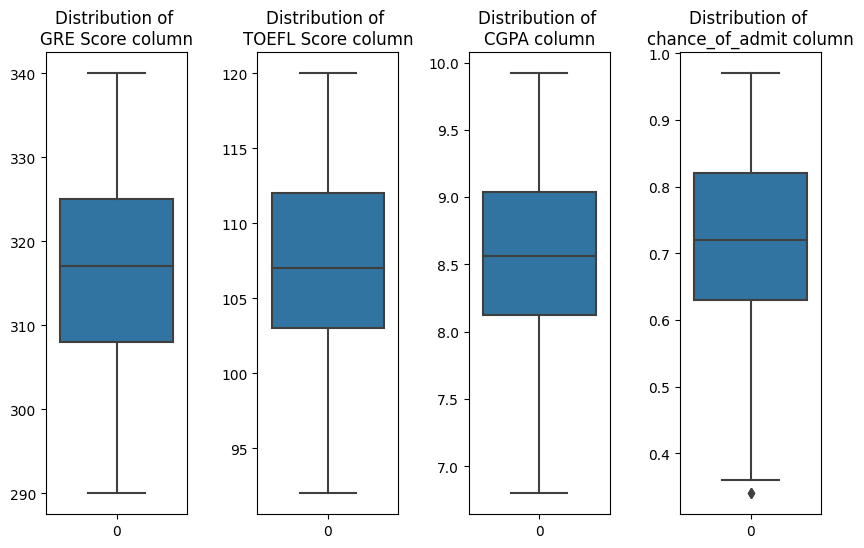

In [15]:
plt.figure(figsize= (10,6))
plt.subplots_adjust(wspace= 0.5)
for i in range(len(num_col)):
    plt.subplot(1,4,i+1)
    sns.boxplot(df[num_col[i]])
    plt.title(f"Distribution of \n{num_col[i]} column")

<Axes: ylabel='chance_of_admit'>

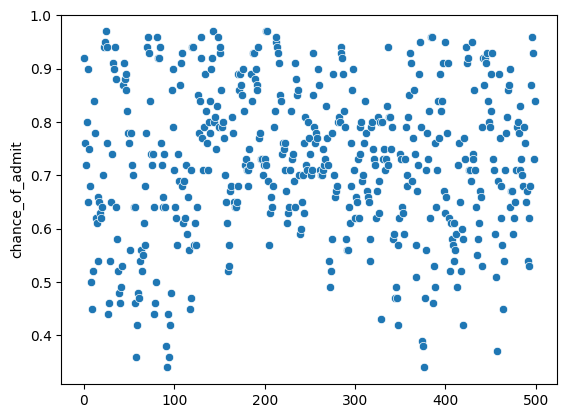

In [16]:
sns.scatterplot(df["chance_of_admit"])

* **there are no significant amount of outliers found in the data**

In [17]:
# dropping Serial No. column from df
df.drop("Serial No.", axis=1, inplace= True)

In [18]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### Categorical Features

In [19]:
cat_col= ['University Rating','SOP','LOR','Research']

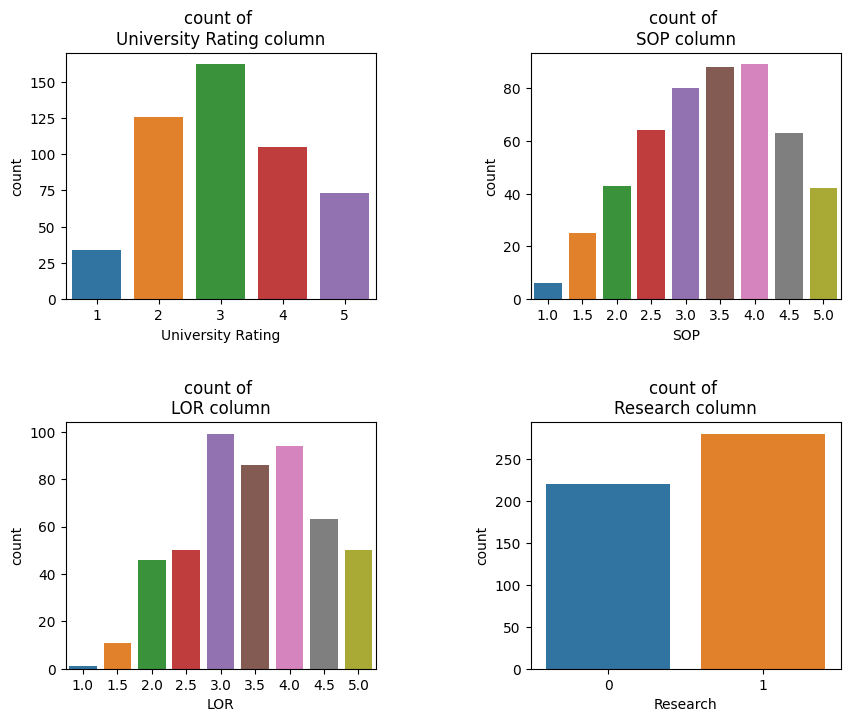

In [20]:
plt.figure(figsize= (10,8))
plt.subplots_adjust(wspace= 0.5)
plt.subplots_adjust(hspace= 0.5)
for i in range(len(cat_col)):
    plt.subplot(2,2,i+1)
    sns.countplot(data= df, x=cat_col[i])
    plt.title(f"count of \n{cat_col[i]} column")

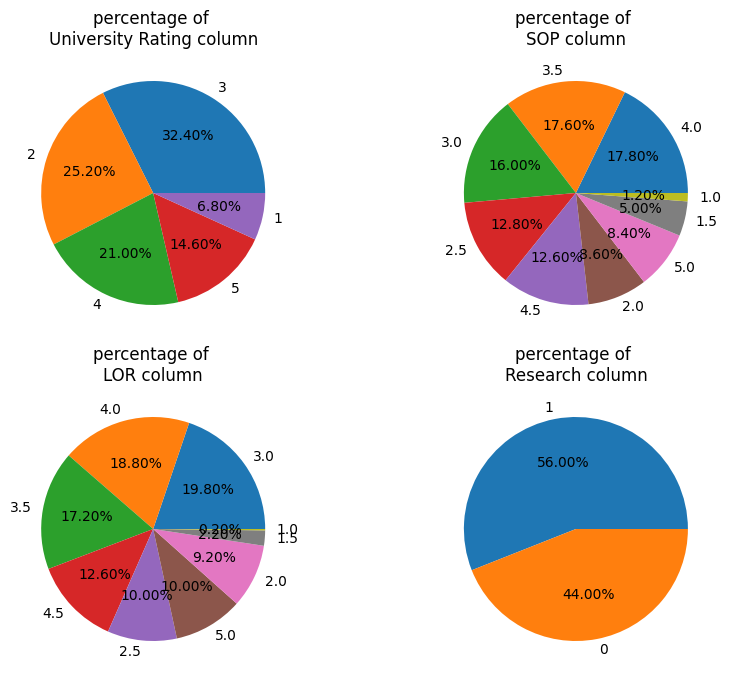

In [21]:
plt.figure(figsize= (10,8))
plt.subplots_adjust(wspace= 0.2)
plt.subplots_adjust(hspace= 0.2)
for i in range(len(cat_col)):
    plt.subplot(2,2, i+1 )
    plt.pie(df[cat_col[i]].value_counts(), labels= df[cat_col[i]].value_counts().index, autopct='%.2f%%' )
    plt.title(f"percentage of \n{cat_col[i]} column")

In [22]:
df[cat_col]= df[cat_col].astype("object")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    object 
 3   SOP                500 non-null    object 
 4   LOR                500 non-null    object 
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    object 
 7   chance_of_admit    500 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 31.4+ KB


In [24]:
df.describe()

,GRE Score,TOEFL Score,CGPA,chance_of_admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


In [25]:
df.describe(include="object")

,University Rating,SOP,LOR,Research
count,500,500.0,500.0,500
unique,5,9.0,9.0,2
top,3,4.0,3.0,1
freq,162,89.0,99.0,280


In [26]:
cat_col

['University Rating', 'SOP', 'LOR', 'Research']

### categorical feature vs Target column

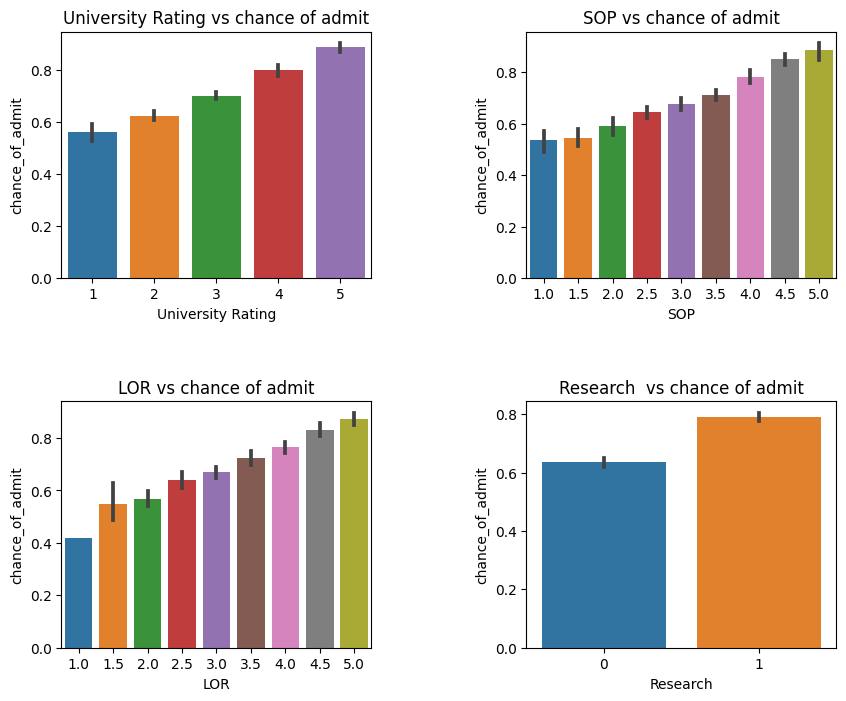

In [27]:
plt.figure(figsize= (10,8))
plt.subplots_adjust(wspace= 0.5)
plt.subplots_adjust(hspace= 0.5)

plt.subplot(2,2,1)
sns.barplot(x=df["University Rating"], y= df["chance_of_admit"], estimator= np.mean)
plt.title("University Rating vs chance of admit")

plt.subplot(2,2,2)
sns.barplot(x=df["SOP"], y= df["chance_of_admit"],estimator= np.mean)
plt.title("SOP vs chance of admit")

plt.subplot(2,2,3)
sns.barplot(x=df["LOR"], y= df["chance_of_admit"], estimator= np.mean)
plt.title("LOR vs chance of admit")

plt.subplot(2,2,4)
sns.barplot(x=df["Research"], y= df["chance_of_admit"],estimator= np.mean)
plt.title("Research  vs chance of admit")
plt.show()


* **As seen in above barplot in all categorcal features, on an average chances of admit are increasing**

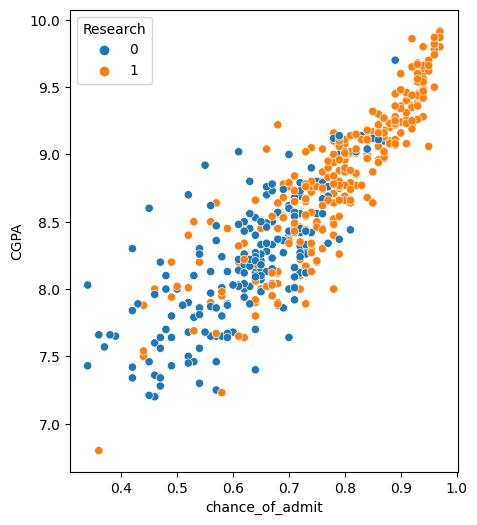

In [28]:
plt.figure(figsize= (5,6))
sns.scatterplot(data=df, x="chance_of_admit", y="CGPA", hue="Research")
plt.show()

- **In above plot we can see there is higher chance of getting admission who have high CGPA and done Some research work**

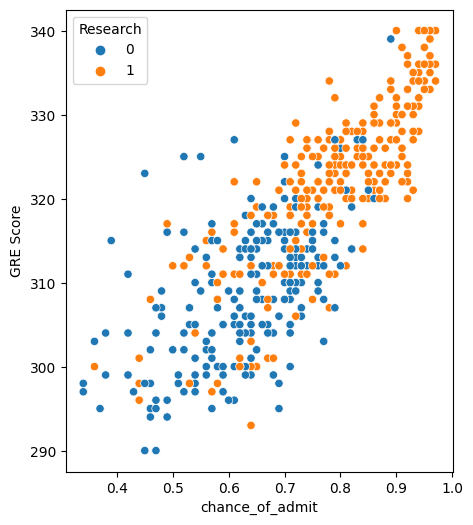

In [29]:
plt.figure(figsize= (5,6))
sns.scatterplot(data=df, x="chance_of_admit", y="GRE Score", hue="Research")
plt.show()

### Heatmap to analyse the correlation between numerical features and Chance of Admit

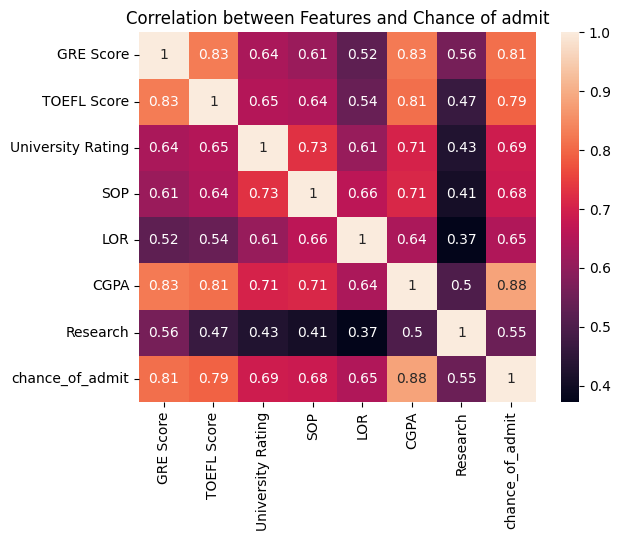

In [30]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between Features and Chance of admit")
plt.show()

- Every variable demonstrates a linear association with the target variable.
- **from above heatmap GRE, TOFEL score and CGPA are showing high positive correlation with chance_of_admit**
- **GRE, TOFEL score and CGPA showing multi-collinearity**

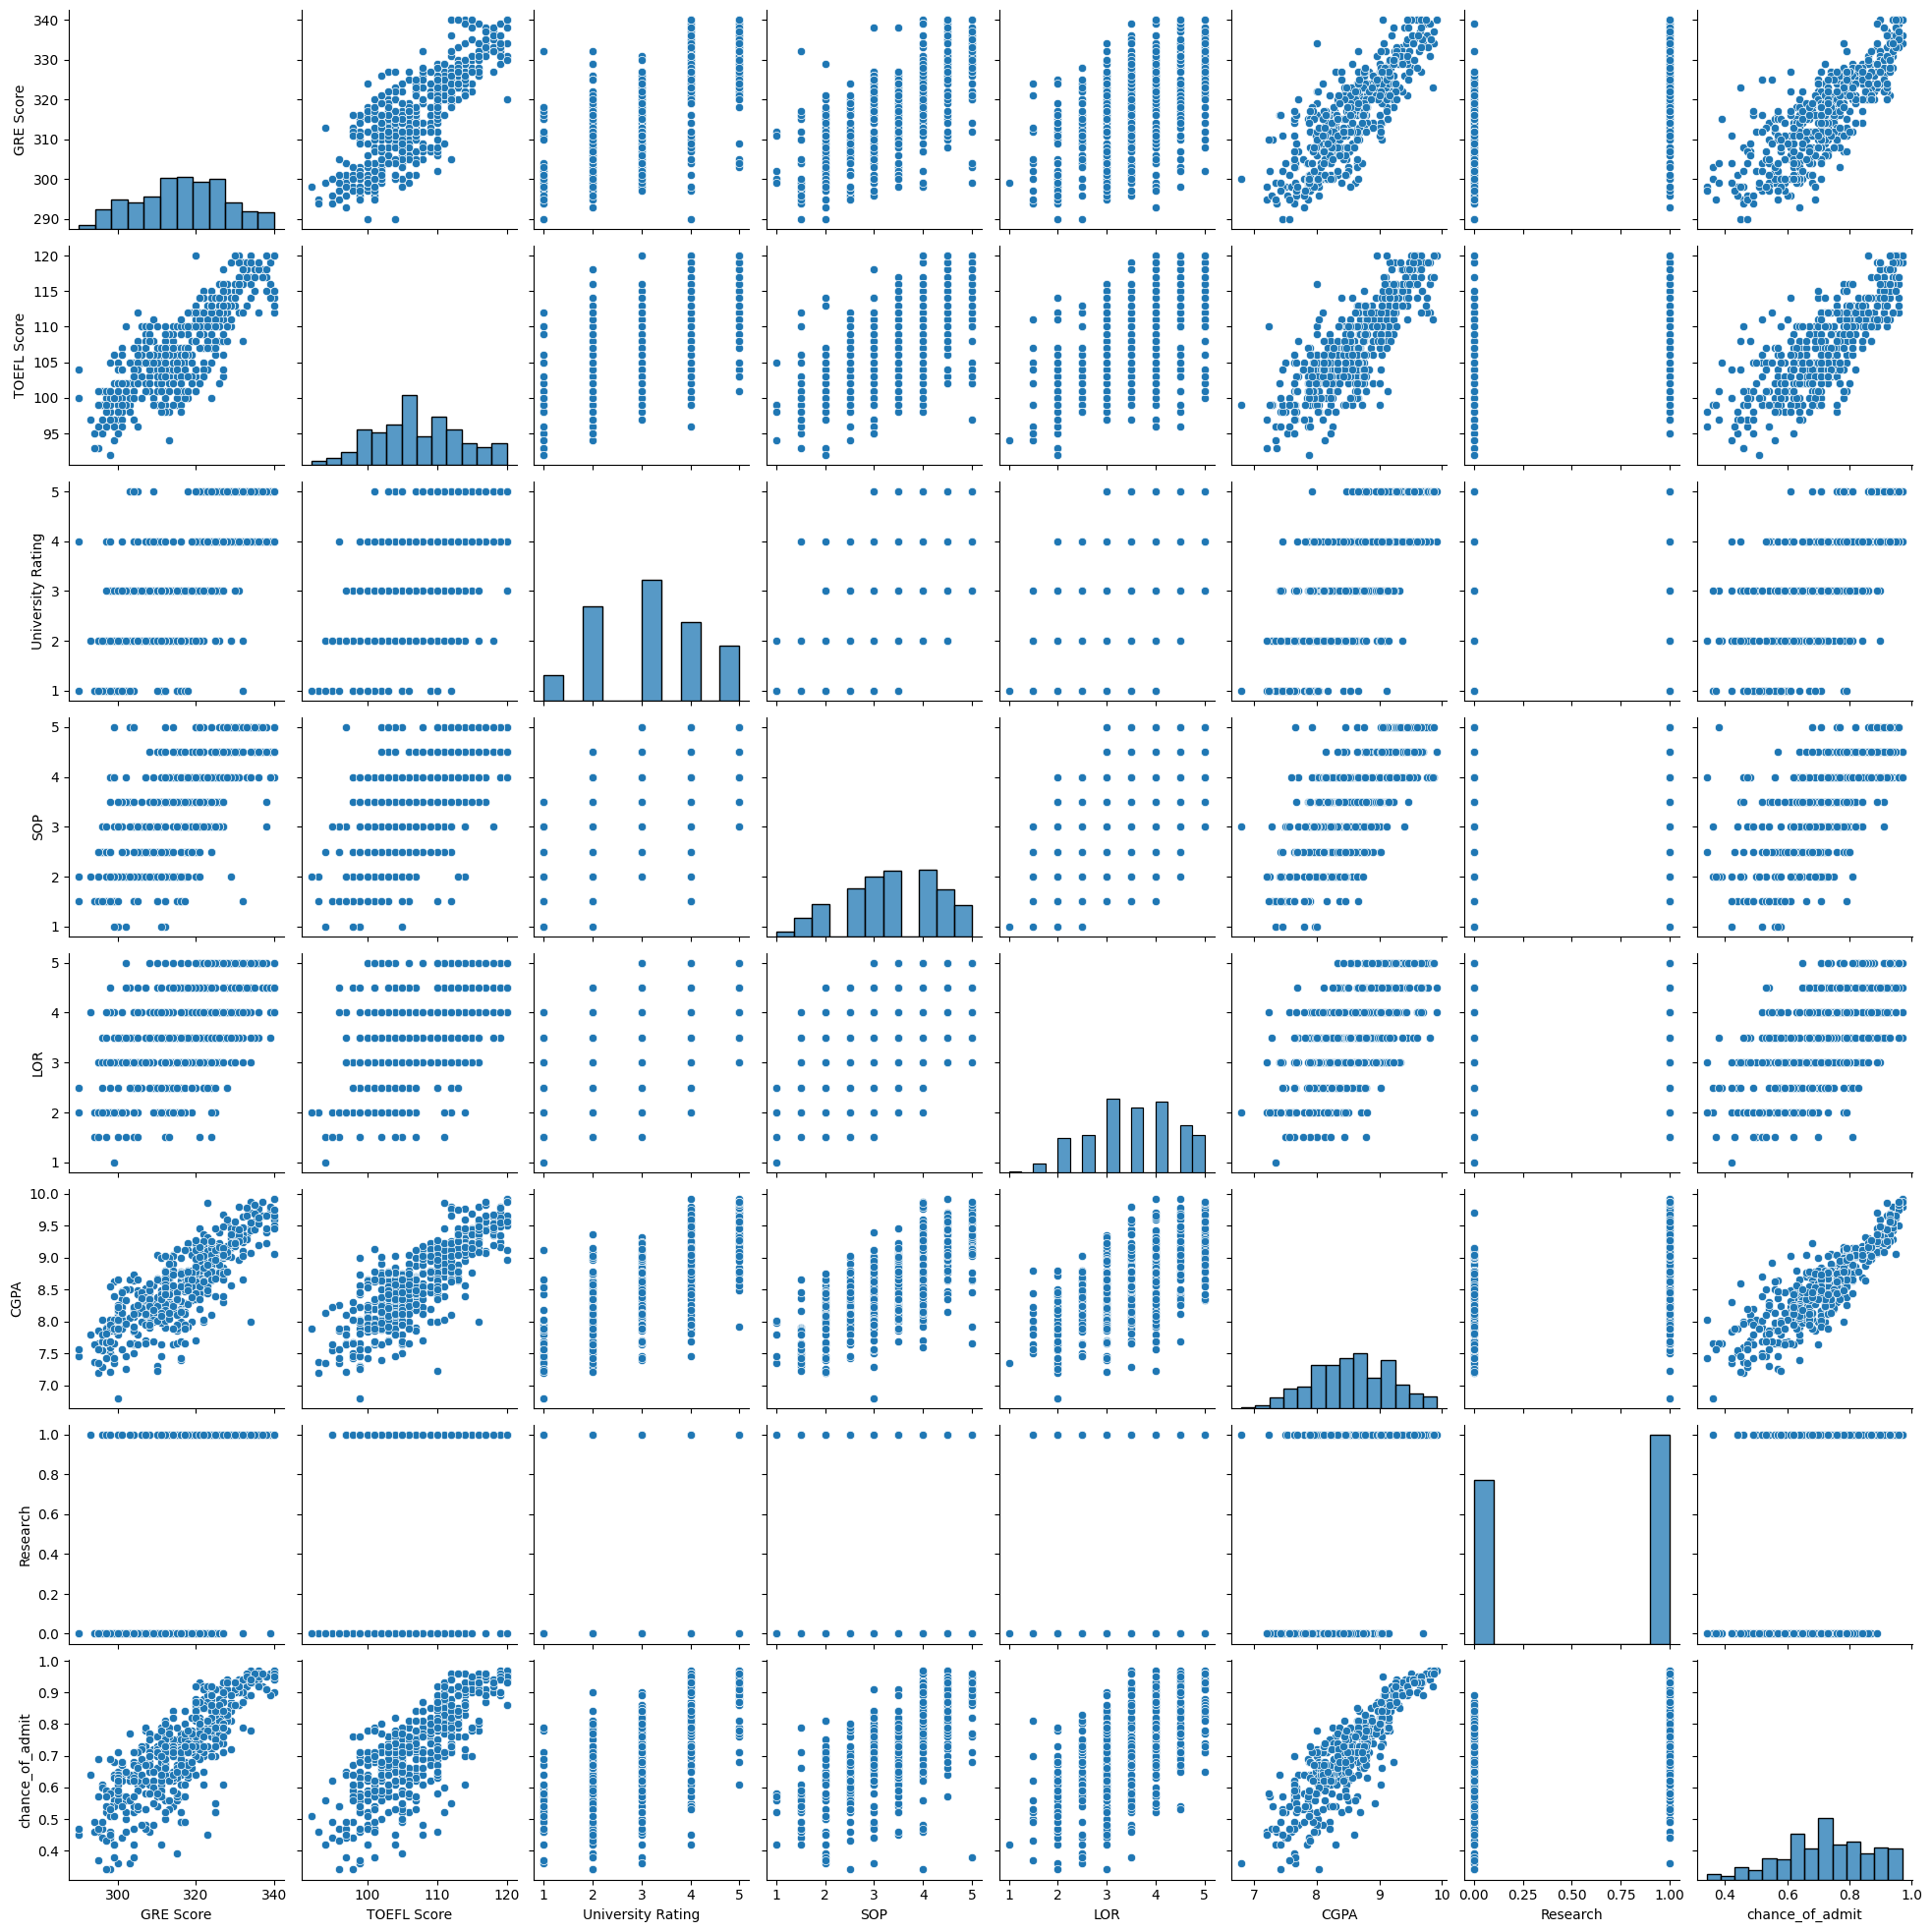

In [31]:
sns.pairplot(df)
plt.show()

* **Exam scores GRE, TOEFL and CGPA have a high positive correlation with chance of admit.**
* **As seen in the above plot, the categorical variables such as university ranking, research, quality of SOP and LOR also increase the chances of admit.**

### Encoding the categorical features using target encoder

In [32]:
colm= ["University Rating", "SOP", "LOR", "Research"]
encoder= TargetEncoder()
df[colm]= encoder.fit_transform(df[colm], df["chance_of_admit"])

In [33]:
X= df.drop('chance_of_admit', axis=1)
y= df["chance_of_admit"]
y.shape, X.shape

((500,), (500, 7))

### Split the data into training data , validation data and test data.
- 70% for training
- 30% for testing

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
scaler= StandardScaler()
scaler.fit(X_train)

X_trn_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

In [36]:
X_trn_scl.shape, X_test_scl.shape

((400, 7), (100, 7))

In [37]:
y_train.shape, y_test.shape

((400,), (100,))

In [38]:
X_trn_scl= pd.DataFrame(X_trn_scl, columns= df.columns[:-1])
X_trn_scl.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.53736,-0.519491,-0.180537,-1.423064,-0.037705,-0.326582,-1.111142
1,0.16364,0.449257,-1.348940,-0.910474,-0.037705,-0.045935,0.899975
2,-1.41361,-1.003865,-0.180537,-0.155013,-0.962330,-1.135504,-1.111142
3,-1.41361,-1.326781,-1.348940,-0.538952,-1.734006,-2.918435,0.899975
4,0.51414,-0.519491,-0.180537,-0.155013,0.445964,0.449323,0.899975


In [39]:
X_sm = sm.add_constant(X_trn_scl)  # Statmodels default is without intercept, to add intercept we need to add constant.
model = sm.OLS(y_train.values, X_sm)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.1
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          3.13e-142
Time:                        01:10:43   Log-Likelihood:                 558.87
No. Observations:                 400   AIC:                            -1102.
Df Residuals:                     392   BIC:                            -1070.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

- **from above summary we got **adj. R-Squared value = 0.818** and R-square value is 0.821**
- **p-value of 'TOFEL score', 'LOR', 'CGPA', and Research showing less than 0.05 that means they are statistically significant in the likelihood of admission**
- **"University Rating" and "SOP" lack statistical significance, implying they may not be robust predictors in the presence of other variables, we can drop "SOP".**
- **Durbin-Watson Test values is less than 2. Means no autocorrelation in the residuals and the homoscedasticity, i.e., the error are close to constant throughout the data**

In [40]:
cl= np.array(["y_intercept", 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'])
cl

array(['y_intercept', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR', 'CGPA', 'Research'], dtype='<U17')

In [41]:
cf= pd.DataFrame(np.array(result.params).reshape(1,-1) , columns=cl)
cf

,y_intercept,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.720925,0.020246,0.019779,0.009214,0.002696,0.011882,0.070969,0.009793


- **In above frame we have constant and coefficient associated with respect that features**
- **We can se CGPA showing highest weightage and SOP less effect on overall model.**

In [42]:
from statsmodels.tools.eval_measures import rmse, mse

In [43]:
ypred= result.predict(X_sm)

In [44]:
rms_error=  rmse(y_train, ypred)
ms_error= mse(y_train, ypred)
print("Root mean sq error:", rms_error)
print("mean sq error:", ms_error)

Root mean sq error: 0.059838171733888224
mean sq error: 0.0035806067964542993


- **Droping 'SOP' feature**

In [45]:
X_trn_scl_new= X_sm.drop(columns= ['SOP'])
X_trn_scl_new.head()

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,-0.53736,-0.519491,-0.180537,-0.037705,-0.326582,-1.111142
1,1.0,0.16364,0.449257,-1.348940,-0.037705,-0.045935,0.899975
2,1.0,-1.41361,-1.003865,-0.180537,-0.962330,-1.135504,-1.111142
3,1.0,-1.41361,-1.326781,-1.348940,-1.734006,-2.918435,0.899975
4,1.0,0.51414,-0.519491,-0.180537,0.445964,0.449323,0.899975


In [46]:
model2 = sm.OLS(y_train.values, X_trn_scl_new).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.5
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          1.99e-143
Time:                        01:10:43   Log-Likelihood:                 558.73
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

- **We can see even after removing 'SOP' there is no significant change in Adj. R sqrd value and R sqrd value**

### Checking the assupmtions of linear regression

### 1. Multicollinearity and implementation
- When one or more input variables exhibhit strong correlation
- One variable is enough to be part of the model.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = pd.DataFrame()

vif['Features'] = X_trn_scl_new.columns
vif['VIF'] = [variance_inflation_factor(X_trn_scl_new.values, i) for i in range(X_trn_scl_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,GRE Score,4.84
5,CGPA,4.56
2,TOEFL Score,4.20
3,University Rating,2.35
4,LOR,1.89
6,Research,1.51
0,const,1.00


- **As we can see in above frame all feature has less than 5 VIF score in "model_2" so no need to drop any feature.**

prediction using using model_2

In [49]:
X_train_col= X_trn_scl.columns

In [50]:
X_test=pd.DataFrame(X_test_scl, columns=X_train_col)

In [51]:
# adding constant
X_test = sm.add_constant(X_test)
X_test.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,-0.274485,-0.196575,-1.001727,-0.910474,-1.734006,-0.227530,-1.111142
1,1.0,-0.362110,-0.035117,-0.180537,-0.538952,-0.679242,-0.178004,0.899975
2,1.0,2.003764,1.902379,1.791006,1.408629,0.445964,1.869065,-1.111142
3,1.0,-0.011610,-0.035117,-1.001727,-0.155013,-0.037705,0.119151,0.899975
4,1.0,0.777014,0.449257,0.875006,1.408629,0.445964,0.647427,0.899975


In [52]:
X_test_new=X_test.drop("SOP", axis=1)
X_test_new.head()

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,-0.274485,-0.196575,-1.001727,-1.734006,-0.227530,-1.111142
1,1.0,-0.362110,-0.035117,-0.180537,-0.679242,-0.178004,0.899975
2,1.0,2.003764,1.902379,1.791006,0.445964,1.869065,-1.111142
3,1.0,-0.011610,-0.035117,-1.001727,-0.037705,0.119151,0.899975
4,1.0,0.777014,0.449257,0.875006,0.445964,0.647427,0.899975


In [53]:
# prediction on test data
ypred= model2.predict(X_test_new)

In [54]:
print('Mean Absolute Error ', mean_absolute_error(y_test,ypred) )
print('Mean Square Error ', mean_squared_error(y_test,ypred) )

Mean Absolute Error  0.04116237427907201
Mean Square Error  0.003545094653906364


- **MSE and MAE are showing low so we can say model is good fit**

### Mean of Residuals

In [55]:
residuals = y_test.values- ypred
mean_residuals = np.mean(residuals)
print(f"Mean of Residuals {mean_residuals}")

Mean of Residuals -0.005905220722790097


### Assumption: Errors are normally distributed.
- If error are normally distributed that means there are no outliers and no skewness.

Text(0.5, 1.0, 'Histogram of residuals')

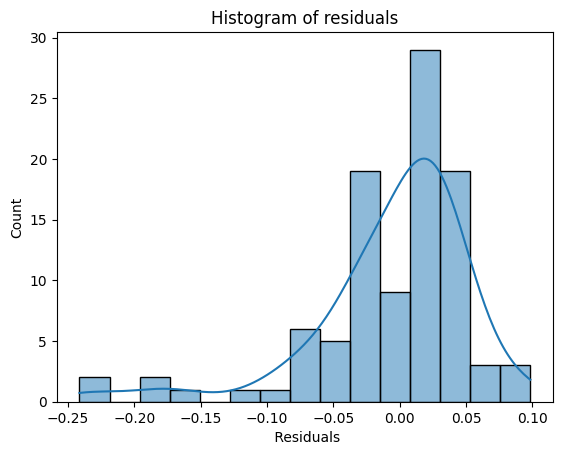

In [56]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

- Plot is showing close to gaussian distribution

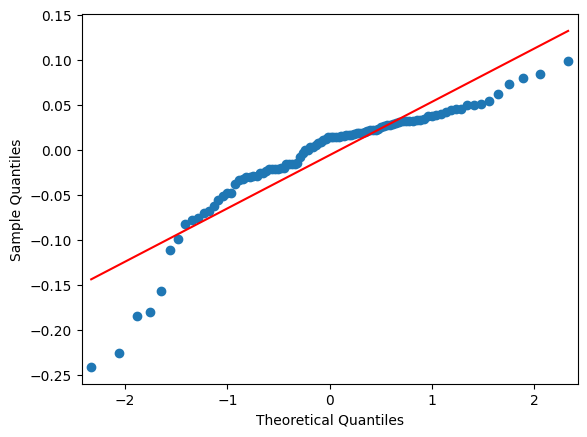

In [57]:
from statsmodels.graphics.gofplots import qqplot
#cheking normality using QQ plot
qqplot(residuals, line="s")
plt.show()

### Test for Homoscedasticity


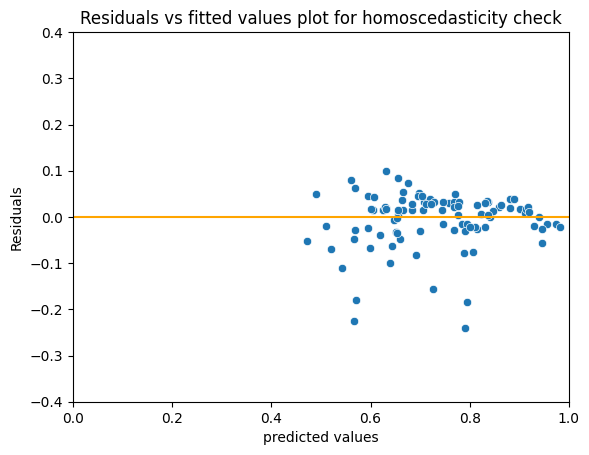

In [58]:
sns.scatterplot(x=ypred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
sns.lineplot(x=[0,26],y=[0,0],color='orange')
plt.title("Residuals vs fitted values plot for homoscedasticity check")
plt.show()

- **Notice that As we go from left to right,the spread of errors is almost constant**

#### Using Goldfeld Quandt Test to check homoskedacity

In [59]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity
# null hypothesis: Ho- residuals are Homoscedastic
# alternate hypothesis: Ha - residuals are not Homoscedastic
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)


[('F statistic', 0.44273535692020916), ('p-value', 0.9951975606665282)]

From the goldfeld-quandt test:
- F Statistic comes out to be 0.442 => Implying minimal difference in variance between groups
- p-value of 0.99 indicates that  error terms are homoscedastic.

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

Text(0, 0.5, 'y_pred')

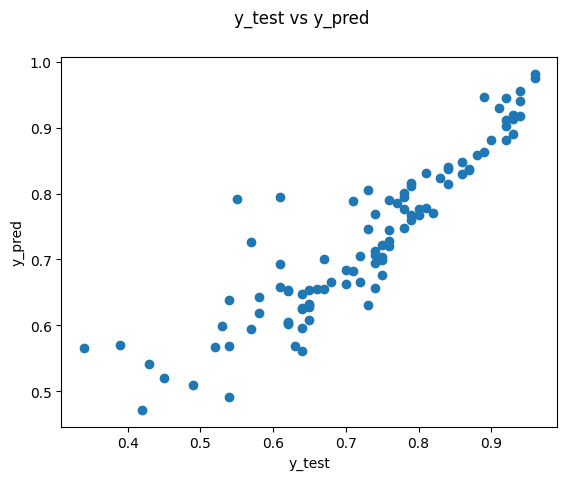

In [60]:
# Plotting y_test and ypred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, ypred)
fig.suptitle('y_test vs y_pred') 
plt.xlabel('y_test')
plt.ylabel('y_pred') 

- from above plot we conclude that model2 showing good prediction for higher values compare to lower

### Linear Regressions uisng sklearn

In [76]:
# Train data
X_trn_scl_sk= X_trn_scl.drop("SOP", axis=1)
X_trn_scl_sk.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,-0.53736,-0.519491,-0.180537,-0.037705,-0.326582,-1.111142
1,0.16364,0.449257,-1.348940,-0.037705,-0.045935,0.899975
2,-1.41361,-1.003865,-0.180537,-0.962330,-1.135504,-1.111142
3,-1.41361,-1.326781,-1.348940,-1.734006,-2.918435,0.899975
4,0.51414,-0.519491,-0.180537,0.445964,0.449323,0.899975


In [77]:
X_trn_scl_sk.shape, y_train.shape

((400, 6), (400,))

In [78]:
X_test_new_sk= X_test_new.drop("const", axis=1)
# test data
X_test_new_sk.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,-0.274485,-0.196575,-1.001727,-1.734006,-0.227530,-1.111142
1,-0.362110,-0.035117,-0.180537,-0.679242,-0.178004,0.899975
2,2.003764,1.902379,1.791006,0.445964,1.869065,-1.111142
3,-0.011610,-0.035117,-1.001727,-0.037705,0.119151,0.899975
4,0.777014,0.449257,0.875006,0.445964,0.647427,0.899975


In [79]:
X_test_new_sk.shape, y_test.shape

((100, 6), (100,))

In [82]:
# training data 
model_3 = LinearRegression()
model_3.fit(X_trn_scl_sk, y_train)

LinearRegression()

- Model intercept and coef.

In [83]:
model_3.intercept_, model_3.coef_

(0.7209250000000001,
 array([0.01999453, 0.02017301, 0.01029393, 0.0124958 , 0.07159793,
        0.00979036]))

In [67]:
y_train_pred= model.predict(X_trn_scl_sk)
y_test_pred = model.predict(X_test_new_sk)

#### Let's check the performance of our previously trained model on test data.


In [84]:
train_r2_score= r2_score(y_train_pred, y_train)
test_r2_score= r2_score(y_test_pred, y_test)
mse= mean_squared_error(y_test_pred, y_test)
print("Train_R_squared value:",train_r2_score)
print("Test_R_squared value:",test_r2_score)
print("mean_squared_error:",mse)

Train_R_squared value: 0.7820031865570939
Test_R_squared value: 0.7594149578109964
mean_squared_error: 0.0035450946539063643


Text(0, 0.5, 'y_test_pred')

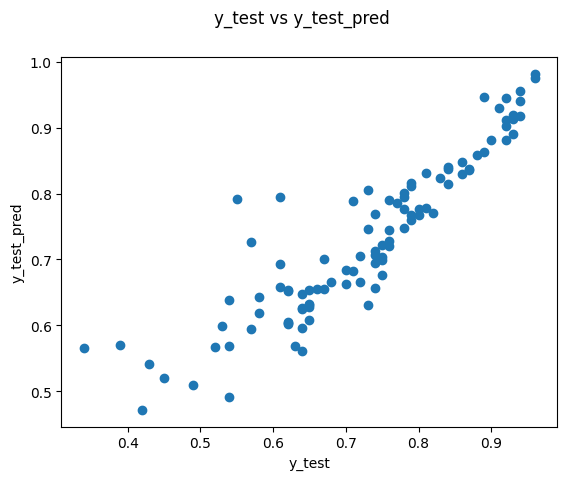

In [85]:
# Plotting y_test and ypred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, ypred)
fig.suptitle('y_test vs y_test_pred') 
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

### Lasso and Ridge Regression
- Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following: 
     - loss fun = MSE + α * (sum of square of coefficients)
     
- Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:
     - loss fun = RSS + α * (sum of absolute value of coefficients)
      
     - here α(alpha) is regularization parameter

In [70]:
models = [
 ['Lasso Regression :', Lasso(alpha=0.1)],
 ['Ridge Regression :', Ridge(alpha=1.0)] 
 ]

for name,model in models:
    print("-"*70)
    model.fit(X_trn_scl_sk, y_train.values)
    predictions = model.predict(X_test_new_sk)
    print(name, "Mean squared error:",mean_squared_error(y_test, predictions))
    print(name,"R sqrd value:", r2_score(y_test, predictions))
    print(name,"coefficeints:", model.coef_)
    print(name,"intercept:", model.intercept_)
    
    print("-"*70)

----------------------------------------------------------------------
Lasso Regression : Mean squared error: 0.013907728911361588
Lasso Regression : R sqrd value: 0.27980275949657774
Lasso Regression : coefficeints: [0.         0.         0.         0.         0.02487534 0.        ]
Lasso Regression : intercept: 0.720925
----------------------------------------------------------------------
----------------------------------------------------------------------
Ridge Regression : Mean squared error: 0.0035467214530711987
Ridge Regression : R sqrd value: 0.8163367276126975
Ridge Regression : coefficeints: [0.02019504 0.02031116 0.01040663 0.0125945  0.07098856 0.00980983]
Ridge Regression : intercept: 0.7209250000000001
----------------------------------------------------------------------


- using diffrent values of aplha

In [86]:
models = [
 ['Lasso Regression :', Lasso(alpha=0.01)],
 ['Ridge Regression :', Ridge(alpha=2.0)] 
 ]

for name,model in models:
    print("-"*70)
    model.fit(X_trn_scl_sk, y_train.values)
    predictions = model.predict(X_test_new_sk)
    print(name, "Mean squared error:",mean_squared_error(y_test, predictions))
    print(name,"R sqrd value:", r2_score(y_test, predictions))
    print(name,"coefficeints:", model.coef_)
    print(name,"intercept:", model.intercept_)
    
    print("-"*70)

----------------------------------------------------------------------
Lasso Regression : Mean squared error: 0.0038644478980389145
Lasso Regression : R sqrd value: 0.7998835949438706
Lasso Regression : coefficeints: [0.01974588 0.01716074 0.0076931  0.0073617  0.07241117 0.00380757]
Lasso Regression : intercept: 0.7209250000000001
----------------------------------------------------------------------
----------------------------------------------------------------------
Ridge Regression : Mean squared error: 0.00354846830117842
Ridge Regression : R sqrd value: 0.8162462689048511
Ridge Regression : coefficeints: [0.02038731 0.02044509 0.01051683 0.01269016 0.07039602 0.00982957]
Ridge Regression : intercept: 0.7209250000000001
----------------------------------------------------------------------


In [88]:
models = [
 ['Lasso Regression :', Lasso(alpha=0.001)],
 ['Ridge Regression :', Ridge(alpha=0.001)] 
 ]

for name,model in models:
    print("-"*70)
    model.fit(X_trn_scl_sk, y_train.values)
    predictions = model.predict(X_test_new_sk)
    print(name, "Mean squared error:",mean_squared_error(y_test, predictions))
    print(name,"R sqrd value:", r2_score(y_test, predictions))
    print(name,"coefficeints:", model.coef_)
    print(name,"intercept:", model.intercept_)
    
    print("-"*70)

----------------------------------------------------------------------
Lasso Regression : Mean squared error: 0.0035637464624058957
Lasso Regression : R sqrd value: 0.8154551052557664
Lasso Regression : coefficeints: [0.01997341 0.01986394 0.01003094 0.01197749 0.07168683 0.00919278]
Lasso Regression : intercept: 0.7209250000000001
----------------------------------------------------------------------
----------------------------------------------------------------------
Ridge Regression : Mean squared error: 0.003545096217178065
Ridge Regression : R sqrd value: 0.8164208887588387
Ridge Regression : coefficeints: [0.01999473 0.02017315 0.01029405 0.0124959  0.07159731 0.00979038]
Ridge Regression : intercept: 0.7209250000000001
----------------------------------------------------------------------


- **From above diffrent lasso and ridge model using diffrent alpha values we can see changes in R sqrd values**
- **alpha as 0.001 giving good fit in case of both models** 

## Insights & Recommendations

#### Insights

- GRE Score, TOEFL Score and CGPA are highly correlated, any application who have high score in one, most likely to have higher score in other two as well.
- Chance of Admit increases with higher score in CGPA.
- About 56% of aplicants who have done research while ~44% of the applicants said no to research.
- Applicant who done some research work and have good CGPA have high chances of admission.
- Most of the applicants have SOP and LOR rating between 3 to 4.5.
- 50% of the students have GRE score less than or equal to 317 and has range from 290 to 340.
- 50% of the students have TOEFL score less than or equal to 107 and has range from 92 to 120.
- Maximum student have research experiance
- 75% of student have less than equal to 82% of chance of getting selected
- CGPA range is between 6.8 to 9.92.
- Data is more baised towards getting chance of admit
- The below variables describes the chances of admit to a good extent having lower p-value and low VIF:
     - GRE Score
     - TOEFL Score
     - University Rating
     - LOR
     - CGPA
     - Research
- Overall the model seems to be a decent fit for the data, but there's room for improvement.
- As a rule of thumb, the lower the MAE score the better. In this case the score is quite closer to 0 which means the regression model is fairly accurate.
- If I got data on those applicants who had less chances of admit then improved model can be build with more accuracy.
     
#### Recommendations
- Graduation Admission - Can use the above stats model2 or model_3 or lasso or ridge (with alpha value 0.001), All this model have good R sqrd values and low MSE. 
- Add more data on those applicants who had less chances of admit then improved model can be build with more accuracy.
- Instead of SOP feature you can provide features like work experience in relevant field.
- Given its positive correlation with admission chances, students should be informed about the importance of having a research background.